In [4]:
import data
import tfrecords_generator
import importlib
importlib.reload(data)
importlib.reload(tfrecords_generator)

from tfrecords_generator import write_data
from data import gen_fcst_norm 
from memory_profiler import memory_usage
import numpy as np

import warnings
warnings.filterwarnings('ignore')

years = [2021]
interval = 0.1

#mem = memory_usage((gen_fcst_norm, (year,)), interval=interval)
#time = np.arange(len(mem)) * interval
#mem_file = "log_memory_generating_norm.dat"

#np.savetxt(mem_file, np.array((time, mem)).T)

for year in years:
    #mem = memory_usage((write_data, (year,)), interval=interval)
    write_data(year)
    #time = np.arange(len(mem)) * interval
    #mem_file = "/network/group/aopp/predict/TIP022_NATH_GFSAIMOD/cGAN/tfrecords/log_memory_writing_data_%s.dat"%year

    #np.savetxt(mem_file, np.array((time, mem)).T)


Samples per image: 8
Doing time index 0
0
0 0


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [3]:
from xarray_batcher import get_fcst_and_truth as gfat

In [4]:
from xarray_batcher.batcher import zarr_store_loader, batch_from_zarr_store

In [3]:
import pickle

with open(f'/network/home/n/nath/cGAN/constants-regICPAC/FCSTNorm2021.pkl', 'rb') as f:
    norm = pickle.load(f)

norm['Convective available potential energy']
    

{'min': 0.0,
 'max': 5060.9165,
 'mean': 353.36827374192967,
 'std': 576.8885141782403}

In [5]:
import data
import importlib
importlib.reload(data)
from data import load_truth_and_mask

truth, mask = np.mean(np.stack(([load_truth_and_mask(str(date).replace('-',''), 0) for date in np.arange('2021-04-01', '2021-04-02', np.timedelta64(1,'D'), dtype='datetime64')])),axis=0)




['/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_00.nc4', '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_06.nc4', '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_12.nc4', '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/20210402_18.nc4']


In [40]:
import glob
import xarray as xr

TRUTH_PATH = '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/'
data_path = glob.glob(TRUTH_PATH+"*.nc4")

ds = xr.open_mfdataset(data_path[0])
#print(ds)

lat_reg_IMERG = ds.lat.values
lon_reg_IMERG = ds.lon.values


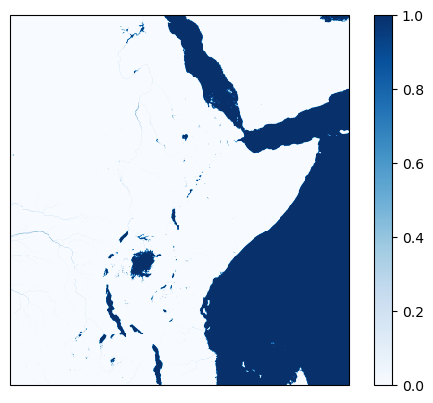

In [78]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection = ccrs.PlateCarree())

mesh = ax.pcolormesh(lon_reg_IMERG, lat_reg_IMERG, np.squeeze(elev)[:,:,1], cmap='Blues')
plt.colorbar(mesh)

In [75]:
from data import load_hires_constants

elev = load_hires_constants(batch_size=1)

In [76]:
elev.shape

(1, 384, 352, 2)

In [38]:
from data_generator import DataGenerator
from data import all_fcst_fields

dgc = DataGenerator(['20220316'],
                       fcst_fields=all_fcst_fields,
                                start_hour=0,
                                end_hour=24,
                                batch_size=1,
                                log_precip=True,
                                shuffle=False,
                                constants=True,
                                fcst_norm=True)

sample = dgc.__getitem__(0)



In [3]:
sample[0]['lo_res_inputs'].shape

(1, 384, 352, 60)

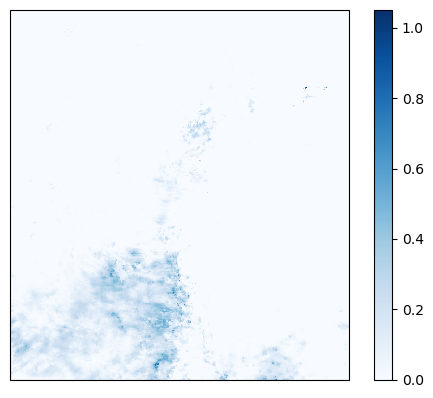

In [45]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

ax = plt.axes(projection = ccrs.PlateCarree())

mesh = ax.pcolormesh(lon_reg_IMERG, lat_reg_IMERG, np.squeeze(sample[1]['output'])[:,:], cmap='Blues')
plt.colorbar(mesh)

In [43]:
(np.isnan(np.squeeze(sample[0]['lo_res_inputs']))).sum()

0

In [1]:
import tensorflow as tf
from tfrecords_generator import _parse_batch

dataset = tf.data.TFRecordDataset('/network/group/aopp/predict/TIP022_NATH_GFSAIMOD/cGAN/tfrecords_v2/2021_0.3.tfrecords',compression_type='GZIP')




2024-05-21 13:47:17.362345: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 13:47:18.351125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 13:47:18.351273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 13:47:18.439984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 13:47:18.751610: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 13:47:18.753973: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
#dataset = dataset.shuffle(64)
dataset = dataset.map(lambda x: _parse_batch(x, insize = (128,128,60), consize=(128,128,2), outsize=(128,128,1)))
            

In [3]:
test = dataset.repeat().batch(2)

In [4]:
for inputs,outputs in test.take(1).as_numpy_iterator():

    print(inputs)

    break

{'lo_res_inputs': array([[[[ 7.41590484e-05,  1.49895743e-04,  0.00000000e+00, ...,
           2.85868645e-01, -1.70755148e+00,  7.99800098e-01],
         [ 5.55953411e-05,  1.12381997e-04,  0.00000000e+00, ...,
           2.91479617e-01, -1.84367239e+00,  7.88494527e-01],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           3.08322966e-01, -2.25213289e+00,  7.54595160e-01],
         ...,
         [ 1.30790308e-01,  3.99165116e-02,  7.59621337e-02, ...,
           5.93489945e-01, -5.70912182e-01,  1.55878559e-01],
         [ 1.55063167e-01,  3.63391452e-02,  1.10166535e-01, ...,
           5.66187620e-01, -5.17328262e-01,  1.39618188e-01],
         [ 2.27930635e-01,  2.55973991e-02,  2.12835014e-01, ...,
           4.84247774e-01, -3.56519252e-01,  9.08217877e-02]],

        [[ 2.46990850e-04,  4.35339578e-04,  0.00000000e+00, ...,
           2.97784537e-01, -1.88318825e+00,  8.50908101e-01],
         [ 1.85240788e-04,  3.26500536e-04,  0.00000000e+00, ...,
    

In [5]:
inputs['lo_res_inputs'].shape

(2, 128, 128, 60)

In [28]:
test = tf.data.Dataset.sample_from_datasets([dataset,dataset,dataset,dataset]).batch(1)

In [15]:
it,_ = next(iter(dataset.batch(3)))

StopIteration: 

In [67]:
tf.__version__

'2.15.0'